# 2A.ml - 2017 - Préparation des données

Ce notebook explique comment les données de la compétation 2017 ont été préparées. On récupére d'abord les données depuis le site [OpenFoodFacts](https://world.openfoodfacts.org/data).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## A quoi ça ressemble

In [2]:
import os
os.stat("c:/temp/fr.openfoodfacts.org.products.csv").st_size / 2**30, 'Go'

(0.938696850091219, 'Go')

C'est gros.

In [3]:
import pyensae

In [4]:
%load_ext pyensae

In [5]:
%head -n 2 c:/temp/fr.openfoodfacts.org.products.csv

In [6]:
import pandas

In [7]:
df = pandas.read_csv("c:/temp/fr.openfoodfacts.org.products.csv", 
                     sep="\t", encoding="utf-8", nrows=10000, low_memory=False)

In [8]:
df.head().T.to_excel("e.xlsx")

In [9]:
df[df.additives.notnull() & df.additives.str.contains("E4")].head().T

""
code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity


## Idée de la compétation

On veut savoir les additifs ajoutés apparaissent plus fréquemment avec certains produits ou certains compositions. ON cherche donc à prédire la présence d'additifs en fonction de toutes les autres variables. Si un modèle de prédiction fait mieux que le hasard, cela signifie que certaines corrélations existent. J'ai utilisé [dask](https://dask.pydata.org/en/latest/) mais si vous de la mémoire, on peut faire avec [pandas](https://pandas.pydata.org/).

In [10]:
import dask
import dask.dataframe as dd

Le code qui suit est construit après plusieurs essais en fonction des warnings retournés par le module *dask*.

In [11]:
ddf = dd.read_csv("c:/temp/fr.openfoodfacts.org.products.csv", sep="\t", encoding="utf-8", low_memory=False,
                 dtype={'allergens': 'object',
       'cities_tags': 'object',
       'emb_codes': 'object',
       'emb_codes_tags': 'object',
       'first_packaging_code_geo': 'object',
       'generic_name': 'object',
       'ingredients_from_palm_oil_tags': 'object',
       'labels': 'object',
       'labels_fr': 'object',
       'labels_tags': 'object',
       'manufacturing_places': 'object',
       'manufacturing_places_tags': 'object',
       'origins': 'object',
       'origins_tags': 'object',
       'stores': 'object',
       'code': 'object','allergens_fr': 'object',
       'cities': 'object',
       'created_t': 'object',
       'last_modified_t': 'object'})
ddf.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(type(ddf))

<class 'dask.dataframe.core.DataFrame'>


On ajoute la colonne à prédire, booleénne, qui indique la présence d'additif commençant par ``'e:'`` comme [E440](http://www.les-additifs-alimentaires.com/E440-pectines.phphttp://www.les-additifs-alimentaires.com/E440-pectines.php).

In [13]:
ddfe = ddf.assign(hasE=ddf.apply(lambda row: isinstance(row.additives, str) and "en:e" in row.additives, 
                                 axis=1, meta=bool))
ddfe.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,hasE
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,False
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,False
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,False
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


On se limite au produit pour lesquels on a quelques informations sur le contenu.

In [14]:
g100 = [_ for _ in ddf.columns if '100g' in _]
g100

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'ma

In [15]:
ddfe.compute().shape

(354144, 164)

In [16]:
import numpy

ddfe100 = ddfe.assign(s100=ddf.apply(lambda row: sum(0 if numpy.isnan(row[g]) else 1 for g in g100), 
                                     axis=1, meta=float))
ddfe100 = ddfe100[ddfe100.s100 > 0]
ddfe100.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,hasE,s100
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,False,17
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,False,17
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,False,13
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5
5,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,9


Bon la suite prend un peu de temps et ça n'est pas hyper efficace. Il faudrait un dask qui n'utilise pas dask mais uniquement les dataframes pour que ça aille plus vite. Café.

In [17]:
ddfe100.to_csv("ddfe100*.csv", sep="\t", encoding="utf-8", index=False)

Bon je crois que je vais vraiment développer une truc comme dask juste avec pandas.

In [18]:
dffefiles = [_ for _ in os.listdir(".") if "ddfe" in _]
dffefiles

['ddfe10000.csv',
 'ddfe10001.csv',
 'ddfe10002.csv',
 'ddfe10003.csv',
 'ddfe10004.csv',
 'ddfe10005.csv',
 'ddfe10006.csv',
 'ddfe10007.csv',
 'ddfe10008.csv',
 'ddfe10009.csv',
 'ddfe10010.csv',
 'ddfe10011.csv',
 'ddfe10012.csv',
 'ddfe10013.csv',
 'ddfe10014.csv',
 'ddfe10015.csv']

## Split...

On impose les mêmes types pour chaque data frame.

In [19]:
types = {k:v for k, v in zip(ddfe100.columns, ddfe100.dtypes)}

In [20]:
from sklearn.model_selection import train_test_split

for i, name in enumerate(dffefiles):
    print("name", name)
    df = pandas.read_csv(name, sep="\t", encoding="utf-8", dtype=types)
    df_train, df_test = train_test_split(df, test_size =0.5)
    df_test, df_eval = train_test_split(df_test, test_size =0.5)
    df_train.to_csv("off_train{0}.txt".format(i), sep="\t", index=False, encoding="utf-8")
    df_test.to_csv("off_test{0}.txt".format(i), sep="\t", index=False, encoding="utf-8")
    df_eval.to_csv("off_eval{0}.txt".format(i), sep="\t", index=False, encoding="utf-8")

name ddfe10000.csv
name ddfe10001.csv
name ddfe10002.csv
name ddfe10003.csv
name ddfe10004.csv
name ddfe10005.csv
name ddfe10006.csv
name ddfe10007.csv
name ddfe10008.csv
name ddfe10009.csv
name ddfe10010.csv
name ddfe10011.csv
name ddfe10012.csv
name ddfe10013.csv
name ddfe10014.csv
name ddfe10015.csv


Ah j'allais oublié, il faut bidouiller la colonne *additives* pour retirer éviter un memory leak et on recalcule la colonne hasE pour être sûr.

In [21]:
df[["additives", "hasE"]].head()

,additives,hasE
0,[ russet-potatoes -> en:russet-potatoes ] [...,False
1,[ grade-a-reduced-fat-milk -> en:grade-a-redu...,True
2,[ cake -> en:cake ] [ sugar -> en:sugar ] ...,True
3,[ whole-grain-yellow-corn -> en:whole-grain-y...,True
4,[ fresh-cucumbers -> en:fresh-cucumbers ] [...,True


In [22]:
import re
reg = re.compile("[[](.*?)[]]")
addi = re.compile("(en[:]e[0-9])")

In [23]:
def has_emachine(v):
    if isinstance(v, (list, pandas.core.series.Series)):
        rem = []
        add = []
        for _ in v:
            if isinstance(_, str):
                fd = reg.findall(_)
                for __ in fd:
                    if " en:e" in __ and addi.search(__):                      
                        add.append(__)#.split("->")[-1].strip())
                    elif " en:" not in __:
                        continue
                    else:
                        rem.append(__.split("->")[-1].strip())
            else:
                continue
        return add, list(sorted(set(rem)))
    elif isinstance(v, float) and numpy.isnan(v):
        return [], []
    elif isinstance(v, str):
        if "," in v:
            raise Exception('{0}\n{1}'.format(type(v), v))
        return has_emachine([v])
    else:
        # ???
        raise Exception('{0}\n{1}'.format(type(v), v))
                    
hasE, clean = has_emachine(df.loc[1,"additives"])
hasE, clean

([],
 ['en:basmati-rice',
  'en:organic-white-basmati-rice',
  'en:rice',
  'en:white-basmati-rice'])

On recompose le tout.

In [24]:
off = [_ for _ in os.listdir(".") if "off" in _ and "all" not in _]

for cont in ['train', 'test', 'eval']:
    sub = [_ for _ in off if cont in _]
    dfs = []
    for name in sub:
        df = pandas.read_csv(name, sep="\t", encoding="utf-8", dtype=types)
        print("name", name, df.shape)
        df["hasE"] = df["additives"].apply(lambda x: len(has_emachine(x)[0]) > 0)
        df["additives"] = df["additives"].apply(lambda x: ";".join(has_emachine(x)[1]))
        dfs.append(df)
    df = pandas.concat(dfs, axis=0)
    print("merged", df.shape)
    df.to_csv("off_{0}_all.txt".format(cont), sep="\t", index=False, encoding="utf-8")

name off_train0.txt (11307, 165)
name off_train1.txt (11484, 165)
name off_train10.txt (7296, 165)
name off_train11.txt (7609, 165)
name off_train12.txt (7780, 165)
name off_train13.txt (7908, 165)
name off_train14.txt (8732, 165)
name off_train15.txt (5315, 165)
name off_train2.txt (10963, 165)
name off_train3.txt (11166, 165)
name off_train4.txt (11113, 165)
name off_train5.txt (11534, 165)
name off_train6.txt (11922, 165)
name off_train7.txt (9489, 165)
name off_train8.txt (7725, 165)
name off_train9.txt (7746, 165)
merged (149089, 165)
name off_test0.txt (5654, 165)
name off_test1.txt (5742, 165)
name off_test10.txt (3648, 165)
name off_test11.txt (3805, 165)
name off_test12.txt (3890, 165)
name off_test13.txt (3954, 165)
name off_test14.txt (4366, 165)
name off_test15.txt (2657, 165)
name off_test2.txt (5481, 165)
name off_test3.txt (5583, 165)
name off_test4.txt (5557, 165)
name off_test5.txt (5767, 165)
name off_test6.txt (5961, 165)
name off_test7.txt (4745, 165)
name off_test8

Il y aura probablement un ou deux data leak dans les autres colonnes..

On découpe le jeu d'évaluation.

In [25]:
len(types)

165

In [26]:
df_eval = pandas.read_csv("off_eval_all.txt", sep="\t", dtype=types, encoding="utf-8")

In [27]:
df_eval_X = df_eval.drop("hasE", axis=1)
df_eval_X.to_csv("off_eval_all_X.txt")
df_eval[["hasE"]].to_csv("off_eval_all_Y.txt")

## Premier modèle

In [28]:
df_train = pandas.read_csv("off_train_all.txt", sep="\t", dtype=types, encoding="utf-8")

In [29]:
df_train.shape

(149089, 165)

In [30]:
X = df_train[g100].fillna(0)
Y = df_train['hasE']

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [32]:
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
pred = clf.predict(X)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, pred)

array([[32549, 33404],
       [15803, 67333]], dtype=int64)

In [35]:
df_test = pandas.read_csv("off_test_all.txt", sep="\t", dtype=types, encoding="utf-8")

In [36]:
X_test = df_test[g100].fillna(0)
Y_test = df_test['hasE']

In [37]:
pred = clf.predict(X_test)
confusion_matrix(Y_test, pred)

array([[16309, 16849],
       [ 7945, 33443]], dtype=int64)

## ROC

In [38]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
print(y_proba[:3])
print(y_pred[:3])

[[ 0.23453245  0.76546755]
 [ 0.44914289  0.55085711]
 [ 0.67701244  0.32298756]]
[ True  True False]


In [39]:
y_test = Y_test.as_matrix()
type(y_pred), type(Y_test), type(y_test)

(numpy.ndarray, pandas.core.series.Series, numpy.ndarray)

In [40]:
import numpy
prob_pred = numpy.array([(y_proba[i, 1] if c else y_proba[i, 0]) for i, c in enumerate(y_pred)])
prob_pred[:3]

array([ 0.76546755,  0.55085711,  0.67701244])

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, th = roc_curve(y_pred == y_test, prob_pred)

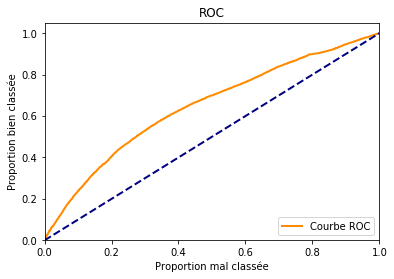

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC')
plt.legend(loc="lower right")

Bon c'est un modèle linéaire donc je suis sûr que vous ferez mieux et puis il y a le pays, la date, les autres ingrédients, bref pas mal de texte.